In [19]:
import pandas as pd


In [2]:
# project = pd.read_excel("data/raw/project.xlsx")
# euscivoc = pd.read_excel("data/raw/euroSciVoc.xlsx")


In [3]:
orgs = pd.read_excel("data/raw/organization.xlsx")


In [4]:
european_countries = [
    'AT', 'BE', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FI', 'FR', 'DE', 'GR',
    'HU', 'IE', 'IT', 'LV', 'LT', 'LU', 'MT', 'NL', 'PL', 'PT', 'RO', 'SK',
    'SI', 'ES', 'SE', 'NO', 'IS', 'LI', 'CH', 'GB', 'BA', 'ME', 'MK', 'AL',
    'RS', 'TR', 'UA', 'NULL'  # 'NULL' for Kosovo (if coded as such in data)
]


In [6]:
health_df = pd.read_csv("data/interim/health_sup.csv")
health_df.shape


(3508, 26)

In [7]:
# Get list of health-related project IDs
health_ids = health_df['projectID'].unique()

# Select only participants in health projects
health_orgs = orgs[orgs['projectID'].isin(health_ids)]

# Now filter for European countries
health_orgs = health_orgs[health_orgs['country'].isin(european_countries)]


In [22]:
health_orgs = pd.read_csv("data/processed/health_orgs.csv")


In [23]:
health_orgs.shape


(14804, 27)

In [9]:
country_names = {
    'BE': 'Belgium', 'BG': 'Bulgaria', 'CZ': 'Czechia', 'DK': 'Denmark', 'DE': 'Germany',
    'EE': 'Estonia', 'IE': 'Ireland', 'GR': 'Greece', 'ES': 'Spain', 'FR': 'France',
    'HR': 'Croatia', 'IT': 'Italy', 'CY': 'Cyprus', 'LV': 'Latvia', 'LT': 'Lithuania',
    'LU': 'Luxembourg', 'HU': 'Hungary', 'MT': 'Malta', 'NL': 'Netherlands', 'AT': 'Austria',
    'PL': 'Poland', 'PT': 'Portugal', 'RO': 'Romania', 'SI': 'Slovenia', 'SK': 'Slovakia',
    'FI': 'Finland', 'SE': 'Sweden', 'IS': 'Iceland', 'LI': 'Liechtenstein', 'NO': 'Norway',
    'CH': 'Switzerland', 'GB': 'United Kingdom', 'BA': 'Bosnia and Herzegovina',
    'ME': 'Montenegro', 'MK': 'North Macedonia', 'AL': 'Albania', 'RS': 'Serbia',
    'TR': 'Türkiye', 'UA': 'Ukraine', 'NULL': 'Kosovo'
}

health_orgs['country_name'] = health_orgs['country'].map(country_names)


In [10]:
from itertools import combinations
from collections import Counter

country_edges = []

for pid, group in health_orgs.groupby('projectID'):
    countries = group['country_name'].dropna().unique()
    if len(countries) >= 2:
        for pair in combinations(sorted(countries), 2):
            country_edges.append(pair)

edge_counts = Counter(country_edges)


In [ ]:
edge_counts


In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for (c1, c2), weight in edge_counts.items():
    if weight >= 5:
        G.add_edge(c1, c2, weight=weight)


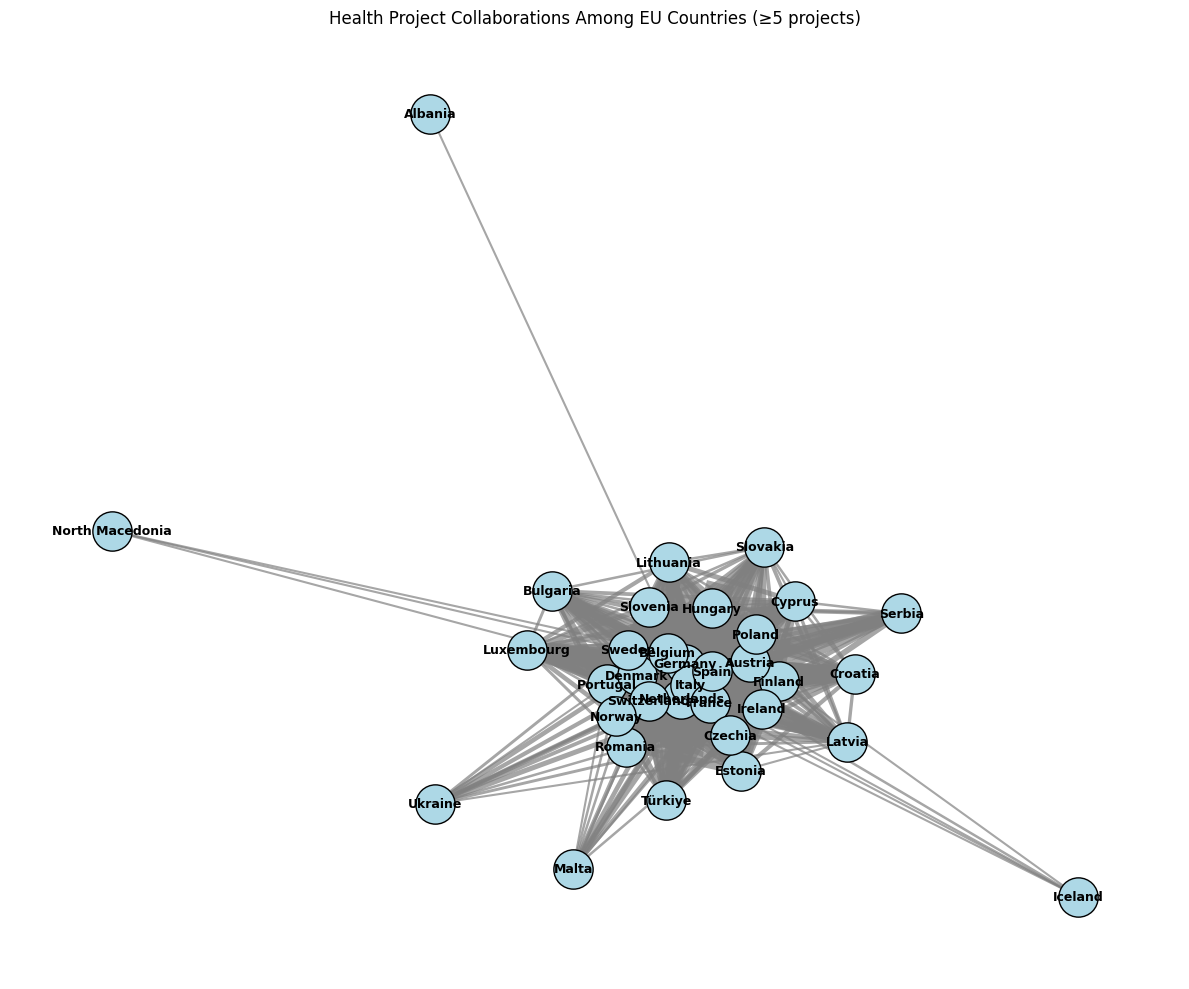

In [12]:
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42, k=0.5)

weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightblue', edgecolors='black')
nx.draw_networkx_edges(G, pos, width=[w * 0.3 for w in weights], edge_color='gray', alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')

plt.title("Health Project Collaborations Among EU Countries (≥5 projects)")
plt.axis('off')
plt.tight_layout()
plt.show()


In [13]:
##trying to get it geographically

geo_pos = {
    'Portugal': (1, 3),
    'Spain': (2, 3),
    'France': (3, 4),
    'Germany': (5, 5),
    'Italy': (5, 3),
    'Belgium': (4, 5),
    'Netherlands': (4.5, 5.5),
    'Luxembourg': (4.2, 4.7),
    'Ireland': (1.5, 6),
    'United Kingdom': (2.5, 6),
    'Denmark': (6, 6),
    'Sweden': (7, 8),
    'Finland': (8, 9),
    'Norway': (6, 9),
    'Poland': (7, 5),
    'Czechia': (6, 4.5),
    'Austria': (6, 4),
    'Switzerland': (5, 4.5),
    'Slovakia': (7, 4),
    'Hungary': (7.5, 3.5),
    'Slovenia': (6.5, 3),
    'Croatia': (7, 3),
    'Romania': (8.5, 3.5),
    'Bulgaria': (9, 3),
    'Greece': (9.5, 2.5),
    'Cyprus': (11, 1),
    'Estonia': (8, 7),
    'Latvia': (8, 6),
    'Lithuania': (8, 5.5),
    'Malta': (6, 1),
    'Serbia': (8, 2.5),
    'Albania': (8.5, 2),
    'North Macedonia': (8.5, 1.5),
    'Montenegro': (8, 1.7),
    'Bosnia and Herzegovina': (7.5, 2),
    'Türkiye': (10, 1),
    'Ukraine': (10, 4),
    'Iceland': (0, 9)

}


In [14]:
import matplotlib.pyplot as plt
import networkx as nx

node_degrees = dict(G.degree())  # or G_filtered.degree() if you filtered earlier


In [15]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

# Normalize degrees to 0–1
norm = colors.Normalize(vmin=min(node_degrees.values()), vmax=max(node_degrees.values()))
cmap = cmap = plt.colormaps['viridis']
  # Try 'viridis', 'plasma', 'coolwarm', etc.

# Map each node to a color
node_colors = [cmap(norm(node_degrees[node])) for node in G.nodes()]


In [16]:
node_sizes = [node_degrees[node] * 100 for node in G.nodes()]


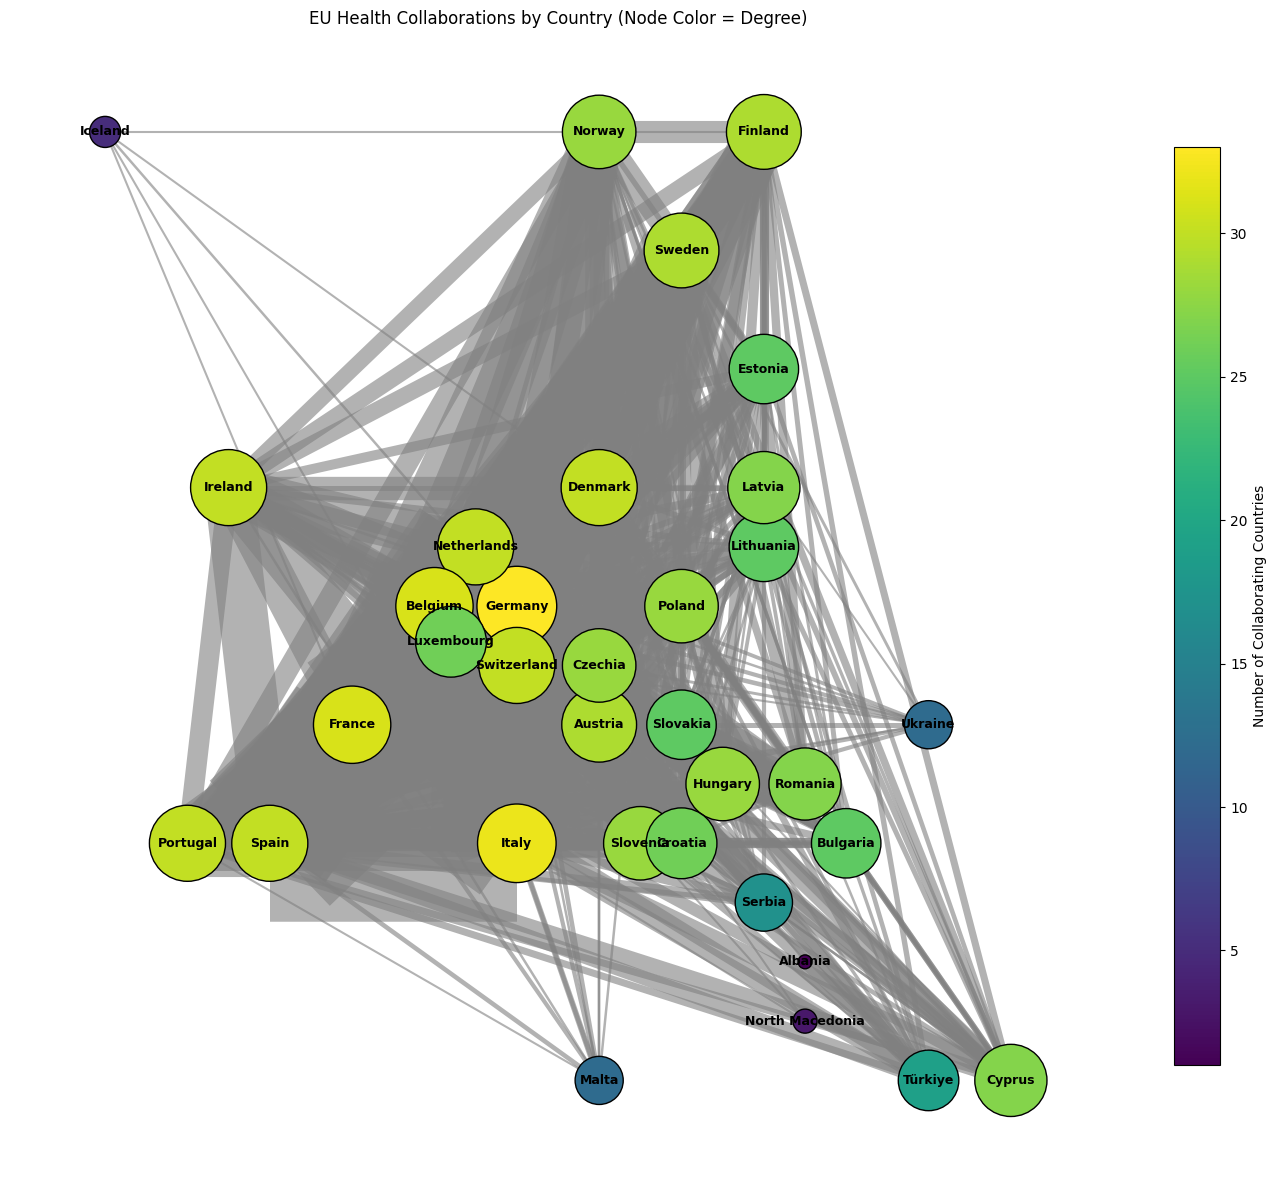

In [17]:
## Colour+ geographically correct++ node size

fig, ax = plt.subplots(figsize=(14, 12))

# Draw nodes
nodes = nx.draw_networkx_nodes(
    G, geo_pos, ax=ax,
    node_size=node_sizes,
    node_color=node_colors,
    edgecolors='black'
)


# Draw edges
nx.draw_networkx_edges(
    G, geo_pos, ax=ax,
    width=[G[u][v]['weight'] * 0.3 for u, v in G.edges()],
    edge_color='gray',
    alpha=0.6
)

# Draw labels
nx.draw_networkx_labels(G, geo_pos, ax=ax, font_size=9, font_weight='bold')

# Title and colorbar
ax.set_title("EU Health Collaborations by Country (Node Color = Degree)")
ax.axis('off')

# Add colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # needed for colorbar to render properly
cbar = fig.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label('Number of Collaborating Countries')

plt.tight_layout()
plt.show()


In [24]:
health_coordinators = health_orgs[health_orgs['role'].str.lower() == 'coordinator']
top_coordinators = health_coordinators['name'].value_counts().head(10)
top_coordinators


name
CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS                  87
INSTITUT NATIONAL DE LA SANTE ET DE LA RECHERCHE MEDICALE          77
KOBENHAVNS UNIVERSITET                                             73
AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACIONES CIENTIFICAS    53
KAROLINSKA INSTITUTET                                              45
MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISSENSCHAFTEN EV        44
VIB VZW                                                            43
KATHOLIEKE UNIVERSITEIT LEUVEN                                     41
UNIVERSITA DEGLI STUDI DI PADOVA                                   38
STICHTING AMSTERDAM UMC                                            36
Name: count, dtype: int64

In [ ]:
pubs = pd.read_excel("data/raw/projectPublications.xlsx")


In [ ]:
pub_counts = pubs['projectID'].value_counts().reset_index()
pub_counts.columns = ['projectID', 'publicationCount']


In [25]:
coordinator_output = pd.read_csv("data/processed/health_orgs_pub.csv")


In [27]:
# coordinator_output = pd.merge(health_coordinators, pub_counts, on='projectID', how='left')
coordinator_output['publicationCount'] = coordinator_output['publicationCount'].fillna(0)


In [28]:
pubs_per_org = coordinator_output.groupby('name')['publicationCount'].sum().sort_values(ascending=False)
pubs_per_org.head(10)


name
EUROPEAN MOLECULAR BIOLOGY LABORATORY                          118.0
UNIVERSITA DEGLI STUDI DI PADOVA                                70.0
ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA                    68.0
MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISSENSCHAFTEN EV     67.0
CHARITE - UNIVERSITAETSMEDIZIN BERLIN                           65.0
INSTITUT NATIONAL DE LA SANTE ET DE LA RECHERCHE MEDICALE       60.0
CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS               54.0
KUNGLIGA TEKNISKA HOEGSKOLAN                                    48.0
CONSIGLIO NAZIONALE DELLE RICERCHE                              48.0
BILKENT UNIVERSITESI VAKIF                                      46.0
Name: publicationCount, dtype: float64

In [29]:
top_coordinators_with_country = (
    health_coordinators
    .groupby(['name', 'country'])
    .size()
    .reset_index(name='num_coordinated_projects')
    .sort_values(by='num_coordinated_projects', ascending=False)
)


In [30]:
top_coordinators_with_country.head(10)


,name,country,num_coordinated_projects
113,CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS,FR,87
385,INSTITUT NATIONAL DE LA SANTE ET DE LA RECHERC...,FR,77
458,KOBENHAVNS UNIVERSITET,DK,73
18,AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGAC...,ES,53
448,KAROLINSKA INSTITUTET,SE,45
499,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...,DE,44
932,VIB VZW,BE,43
449,KATHOLIEKE UNIVERSITEIT LEUVEN,BE,41
802,UNIVERSITA DEGLI STUDI DI PADOVA,IT,38
684,STICHTING AMSTERDAM UMC,NL,36


In [31]:
### trendline???
# Frequency of coordination
coord_freq = health_coordinators['name'].value_counts().reset_index()
coord_freq.columns = ['name', 'coord_count']

# Publication counts merged
pubs_per_org = coordinator_output.groupby('name')['publicationCount'].sum().reset_index()

# Merge both
combined = pd.merge(coord_freq, pubs_per_org, on='name')
combined.columns = ['Institution', 'Coordinated Projects', 'Total Publications']


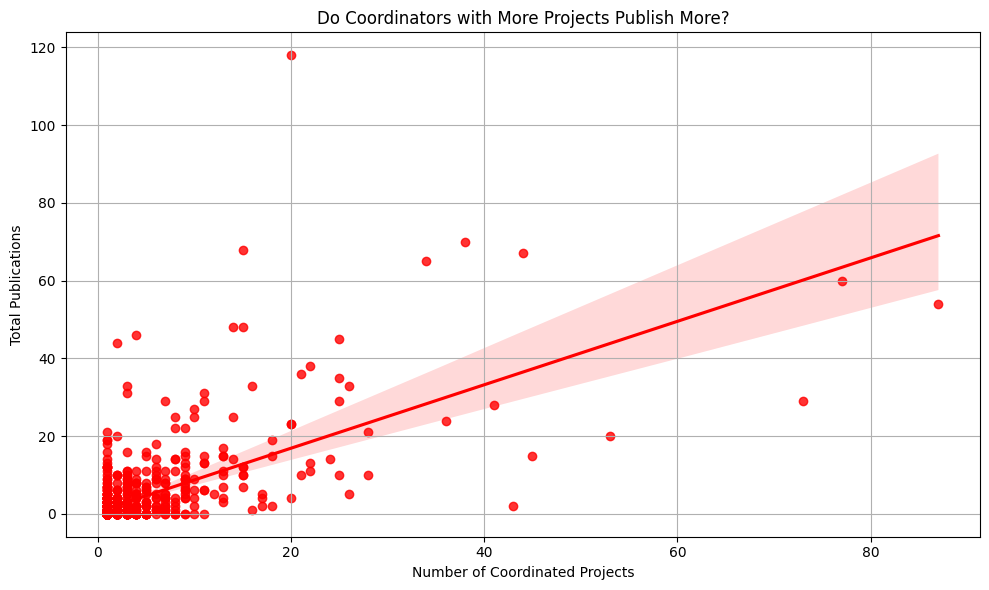

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(
    data=combined,
    x='Coordinated Projects',
    y='Total Publications',
    scatter=True,  # This is True by default, but good to be explicit
    color='red'
)

plt.title("Do Coordinators with More Projects Publish More?")
plt.xlabel("Number of Coordinated Projects")
plt.ylabel("Total Publications")
plt.grid(True)
plt.tight_layout()
plt.show()
top_combined = combined.sort_values('Total Publications', ascending=False).head(10)



